In [1]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [2]:


# Specify column names directly
column_names = ['MovieID', 'Title', 'Genres']

# Read the .dat file with specified delimiter, encoding, and column names
Movies = pd.read_csv('movies.dat', sep='::', names=['MovieNo','Title', 'Genres'], engine='python', encoding='latin1')

# Drop rows with missing values
Movies.dropna(inplace=True)

# Display the first few rows
Movies.head()

,MovieNo,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
Ratings = pd.read_csv('ratings.dat',  sep='::', names= ['MovieID','Rating', 'Timestamp' ], engine='python', encoding='latin1')

Ratings.dropna(inplace=True)

Ratings.head()

,MovieID,Rating,Timestamp
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [4]:
Users = pd.read_csv('users.dat', sep='::', names=['UserId', 'Sex', 'Age', 'Occupation', 'Zip-code'], 
                    engine='python', encoding='latin1')

Users.dropna(inplace=True)

Users.head()

,UserId,Sex,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#Input users dataset
users = pd.read_csv(r"users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
#Merge User and ratings data
Ratings = pd.DataFrame(Ratings)
Users = pd.DataFrame(Users)

# Merge User and Ratings data on 'MovieID'
User_ratings = Users.merge(Ratings, left_on='UserId', right_on='MovieID')

# Display the merged DataFrame
User_ratings

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1,5,978824268
1,1,F,1,10,48067,1,4,978237008
2,1,F,1,10,48067,1,4,978233496
3,1,F,1,10,48067,1,5,978225952
4,1,F,1,10,48067,1,5,978226474
...,...,...,...,...,...,...,...,...
1000204,3952,F,45,1,12449,3952,4,992072099
1000205,3952,F,45,1,12449,3952,3,986223125
1000206,3952,F,45,1,12449,3952,4,1011902656
1000207,3952,F,45,1,12449,3952,1,979852537


In [7]:
Movies = pd.DataFrame(Movies)

# Merge User_ratings with movies_df based on 'MovieID' and 'MovieNo'
Master_data = User_ratings.merge(Movies, left_on='MovieID', right_on='MovieNo')

# Display the final merged DataFrame
Master_data

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,MovieNo,Title,Genres
0,1,F,1,10,48067,1,5,978824268,1,Toy Story (1995),Animation|Children's|Comedy
1,1,F,1,10,48067,1,4,978237008,1,Toy Story (1995),Animation|Children's|Comedy
2,1,F,1,10,48067,1,4,978233496,1,Toy Story (1995),Animation|Children's|Comedy
3,1,F,1,10,48067,1,5,978225952,1,Toy Story (1995),Animation|Children's|Comedy
4,1,F,1,10,48067,1,5,978226474,1,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3952,F,45,1,12449,3952,4,992072099,3952,"Contender, The (2000)",Drama|Thriller
1000205,3952,F,45,1,12449,3952,3,986223125,3952,"Contender, The (2000)",Drama|Thriller
1000206,3952,F,45,1,12449,3952,4,1011902656,3952,"Contender, The (2000)",Drama|Thriller
1000207,3952,F,45,1,12449,3952,1,979852537,3952,"Contender, The (2000)",Drama|Thriller


In [8]:
Master_data.describe()

,UserId,Age,Occupation,MovieID,Rating,Timestamp,MovieNo
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.048282e+01,8.176733e+00,1.865540e+03,3.581564e+00,9.722437e+08,1.865540e+03
std,1.096041e+03,1.326605e+01,6.272765e+00,1.096041e+03,1.117102e+00,1.215256e+07,1.096041e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00
25%,1.030000e+03,2.500000e+01,3.000000e+00,1.030000e+03,3.000000e+00,9.653026e+08,1.030000e+03
50%,1.835000e+03,2.500000e+01,7.000000e+00,1.835000e+03,4.000000e+00,9.730180e+08,1.835000e+03
75%,2.770000e+03,3.500000e+01,1.400000e+01,2.770000e+03,4.000000e+00,9.752209e+08,2.770000e+03
max,3.952000e+03,5.600000e+01,2.000000e+01,3.952000e+03,5.000000e+00,1.046455e+09,3.952000e+03


In [9]:
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserId      1000209 non-null  int64 
 1   Sex         1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Timestamp   1000209 non-null  int64 
 8   MovieNo     1000209 non-null  int64 
 9   Title       1000209 non-null  object
 10  Genres      1000209 non-null  object
dtypes: int64(7), object(4)
memory usage: 91.6+ MB


In [10]:
# Filter the rows with a rating of 5
highly_rated_movies = Master_data[Master_data['Rating'] == 5]

# Display the movies with a rating of 5
print(highly_rated_movies)

         UserId Sex  Age  Occupation Zip-code  MovieID  Rating  Timestamp  \
0             1   F    1          10    48067        1       5  978824268   
3             1   F    1          10    48067        1       5  978225952   
4             1   F    1          10    48067        1       5  978226474   
6             1   F    1          10    48067        1       5  978555994   
11            1   F    1          10    48067        1       5  978102970   
...         ...  ..  ...         ...      ...      ...     ...        ...   
1000173    3952   F   45           1    12449     3952       5  984802874   
1000182    3952   F   45           1    12449     3952       5  998535231   
1000185    3952   F   45           1    12449     3952       5  988285919   
1000199    3952   F   45           1    12449     3952       5  971501252   
1000201    3952   F   45           1    12449     3952       5  994750078   

         MovieNo                  Title                       Genres  
0   

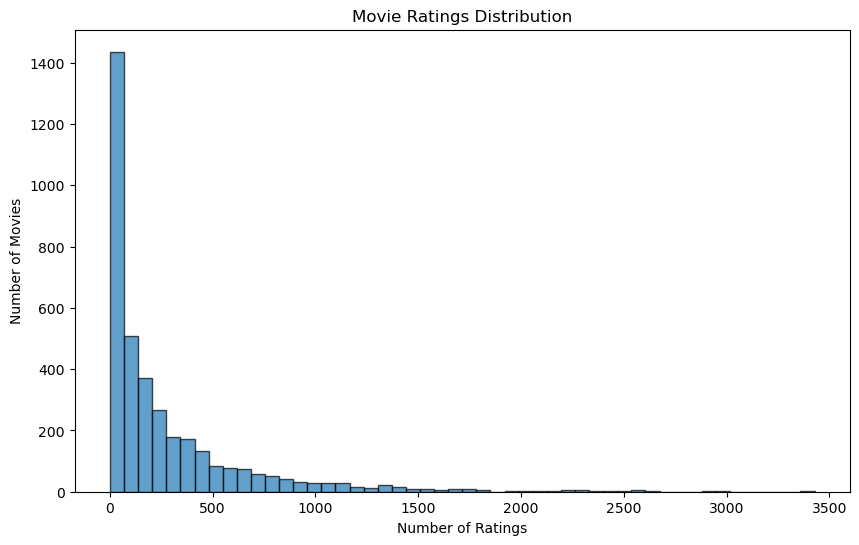

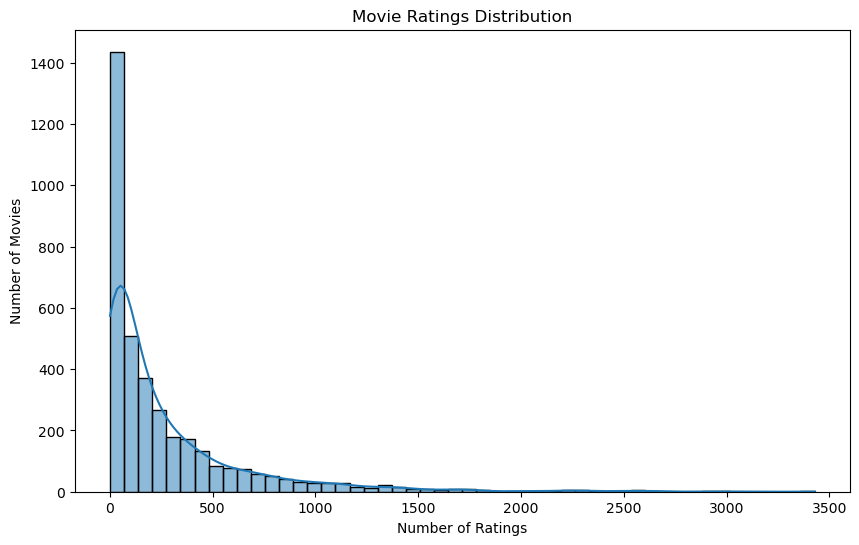

In [11]:
ratings_count = Master_data.groupby('MovieID')['Rating'].count()


plt.figure(figsize=(10, 6))
plt.hist(ratings_count, bins=50, edgecolor='k', alpha=0.7)
plt.title('Movie Ratings Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_count, bins=50, kde=True)
plt.title('Movie Ratings Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

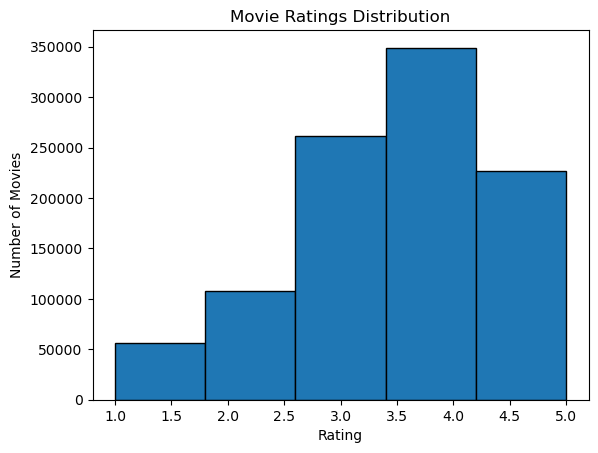

In [12]:
# Create a histogram of movie ratings
plt.hist(Master_data['Rating'], bins=5, range=(1, 5), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movie Ratings Distribution')
plt.show()


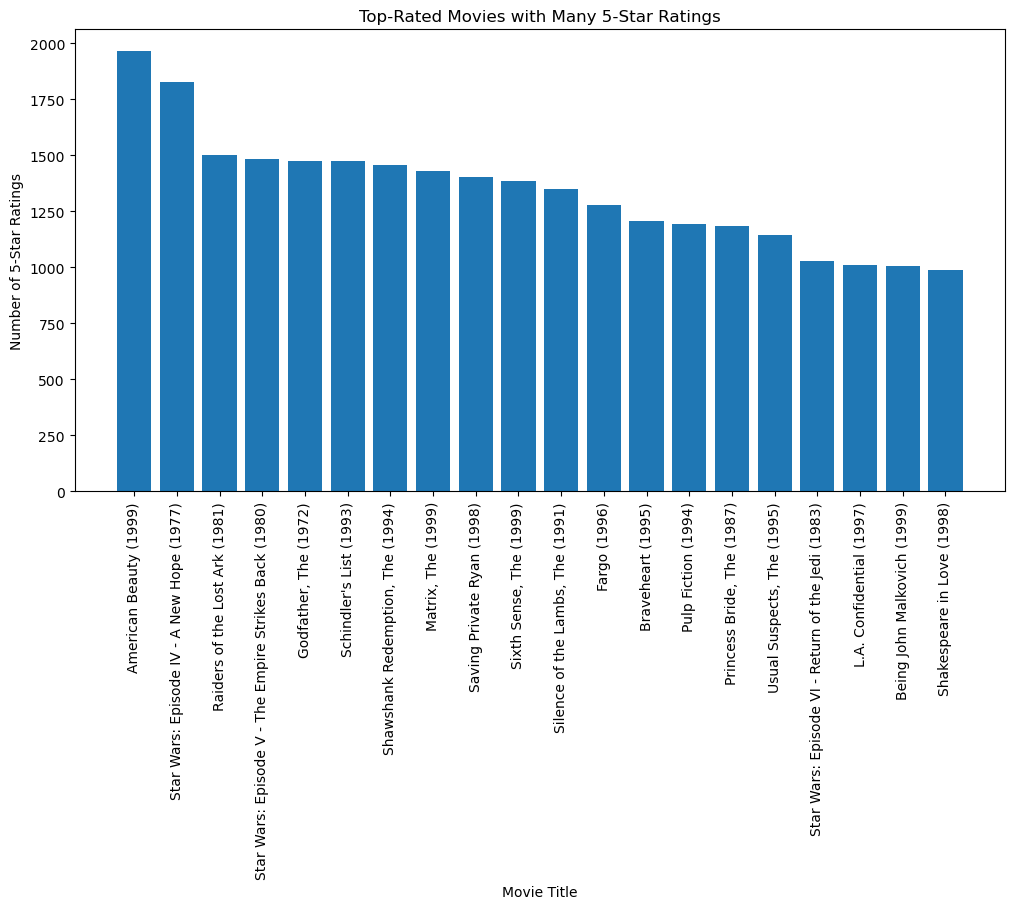

In [13]:
# Group by movie title and count 5-star ratings
movie_ratings = Master_data[Master_data['Rating'] == 5].groupby('Title')['Rating'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Rating', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['Title'][:20], top_rated_movies['Rating'][:20]) 
plt.xlabel('Movie Title')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies with Many 5-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

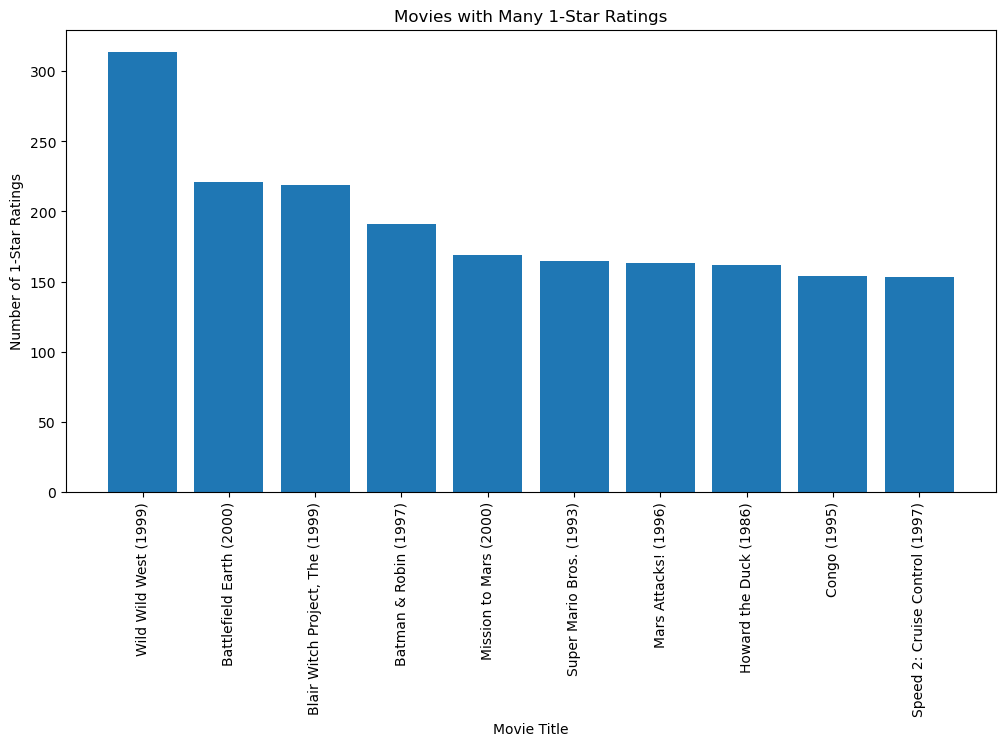

In [14]:
#  Movies with a rating of 1
low_rated_movies = Master_data[Master_data['Rating'] == 1]

# Grouping by movie title and count the number of ratings
movie_ratings_count = low_rated_movies['Title'].value_counts().reset_index()
movie_ratings_count.columns = ['Title', 'Number of 1-Star Ratings']

# Sorting the movies by the number of 1-star ratings in descending order
top_low_rated_movies = movie_ratings_count.sort_values(by='Number of 1-Star Ratings', ascending=False)


# Create a bar plot for the top low-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_low_rated_movies['Title'][:10], top_low_rated_movies['Number of 1-Star Ratings'][:10])  
plt.xlabel('Movie Title')
plt.ylabel('Number of 1-Star Ratings')
plt.title('Movies with Many 1-Star Ratings')
plt.xticks(rotation=90)  
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [16]:
# Modifying the feature selection and data loading as needed
X = Master_data[['Age', 'Occupation']]
y = Master_data['Rating']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [21]:
# Print model evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error (MSE): 1.25
Root Mean Squared Error (RMSE): 1.12
R-squared (R2) Score: 0.00


In [22]:
# To predict the rating for a new user with age 20 and occupation 7
new_data = np.array([[20, 7]])
predicted_rating = model.predict(new_data)
print(f"Predicted Rating: {predicted_rating[0]:.2f}")

Predicted Rating: 3.59


In [23]:
pip install scikit-surprise


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_surprise-1.1.3-cp39-cp39-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [25]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Master_data[['UserId', 'MovieID', 'Rating']], reader)


In [26]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [28]:
model = SVD()
model.fit(trainset)



In [29]:
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.2f}")


RMSE: 0.9811
RMSE: 0.98


In [30]:
# Recommend movies for a specific user 
user_id = 1
movies_rated_by_user = Master_data[Master_data['UserId'] == user_id]['MovieID']
movies_not_rated_by_user = Master_data[~Master_data['MovieID'].isin(movies_rated_by_user)]
movies_to_recommend = movies_not_rated_by_user['MovieID'].unique()

user_predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_recommend]

# Sort and filter the top movie recommendations by predicted rating
sorted_predictions = sorted(user_predictions, key=lambda x: x.est, reverse=True)
top_n = 10  # Number of top recommendations to display

# Keep track of recommended movies to ensure they are unique
recommended_movies = set()
top_movie_titles = []

for prediction in sorted_predictions:
    if len(recommended_movies) >= top_n:
        break
    if prediction.iid not in recommended_movies:
        recommended_movies.add(prediction.iid)
        top_movie_titles.append(Master_data[Master_data['MovieID'] == prediction.iid]['Title'].values[0])

print(f"Top {top_n} Movie Recommendations for User {user_id}:\n")
for i, title in enumerate(top_movie_titles):
    print(f"{i + 1}. {title}")

Top 10 Movie Recommendations for User 1:

1. Shawshank Redemption, The (1994)
2. Schindler's List (1993)
3. Raiders of the Lost Ark (1981)
4. Usual Suspects, The (1995)
5. Star Wars: Episode IV - A New Hope (1977)
6. Godfather, The (1972)
7. Citizen Kane (1941)
8. American Beauty (1999)
9. Sixth Sense, The (1999)
10. Casablanca (1942)
